<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-BlackPuma075/blob/main/Nov_10_11/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import glob
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

In [2]:
#Los datos corresponden a un subset del dataset cats vs dogs de https://www.kaggle.com/c/dogs-vs-cats
files=glob.glob('/content/drive/MyDrive/Machine_Learning/CATS_DOGS/*')

In [3]:
#numero de pixeles para nuestras imágenes.
num_px=64

In [4]:
train_x=[]
train_y=[]
for file in files[:100]:
    img=Image.open(file)
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    train_x.append(data)
    img.close()
    if 'dog' in file:
        train_y.append(1)
    if 'cat' in file:
        train_y.append(0)
train_y=np.asarray(train_y)
train_x=np.asarray(train_x)

In [5]:
test_x=[]
test_y=[]
for file in files[1700:]:
    #print(file)
    img=Image.open(file)
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    test_x.append(data)
    img.close()
    if 'dog' in file:
        test_y.append(1)
    if 'cat' in file:
        test_y.append(0)
test_y=np.asarray(test_y)
test_x=np.asarray(test_x)

In [6]:
train_x_flatten = train_x.reshape(train_x.shape[0], -1).T

test_x_flatten = test_x.reshape(test_x.shape[0], -1).T

train_set_y=train_y.reshape((1,train_y.shape[0]))
test_set_y=test_y.reshape((1,test_y.shape[0]))

In [7]:
train_set_x= train_x_flatten/255
test_set_x= test_x_flatten/255

$a = \sigma(z)=\frac{1}{1+e^{-z}}$ ; Función de activación

$z = w^{T}x+b$ ; Modelo para la función de activación

$J(w,b)= -\frac{1}{m}\sum{[y^{(i)}\log{\hat{y}^{(i)}}+(1-y^{(i)})\log{(1-\hat{y}^{(i)}})]}$ ; Función costo

In [8]:
#Función de activación
def sigmoide(z): #Defino la función de activación (sigmoide)
  a = 1/(1+np.exp(-z))
  return a

In [9]:
def aleatorio(dim): #inicializo los pesos en cero, defino la función para que la dimensión
  w = np.random.rand(dim,1) #de los pesos iniciales sea la misma que la del conjunto x y poder realizar los cálculos
  b = np.random.rand()
  return w,b

In [10]:
def prop11(x,y): #Defino la neurona 1 de la capa 1
  w , b= aleatorio(x.shape[0])
  a = sigmoide(np.dot(w.T,x)+b)
  print(a) #Calcula la función de activación con w,b aleatorios entre cero y 1
  return a

In [11]:
def prop12(x,y): #Defino la neurona 2 de la capa 1
  w , b= aleatorio(x.shape[0])
  a = sigmoide(np.dot(w.T,x)+b)
  #Calcula la función de activación con w,b aleatorios entre cero y 1
  return a

In [12]:
def prop21(x,y): #Defino la neurona 1 de la capa 2
  a11 = prop11(x,y) #Evalúo en la neurona 1 de la capa 1 que me devuelve el vector a11
  a12 = prop12(x,y) #Evalúo en la neurona 2 de la capa 1 que me devuelve el vector a12
  #Genero mi nuevo vector (a) de la capa 1, el cual está formado por las componentes (a11) y (a12) de la capa uno
  a1 = np.hstack((a11, a12)) #Nuevo vector (a1) de la capa 1, el cual es el vector de entrada de mi neurona 2
  w2, b2 = aleatorio(a1.shape[0])#Genero un w y un b nuevos con la forma del vector de entrada (a1)
  a2 = sigmoide(np.dot(w2,a1)+b2) #Calculo (y) gorrito (la salida de la NN)
  print(a2)
  return

In [13]:
y = prop11(train_set_x, train_set_y)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]]


Según la predicción, los 100 objetos del conjunto de entrenamiento son gatos

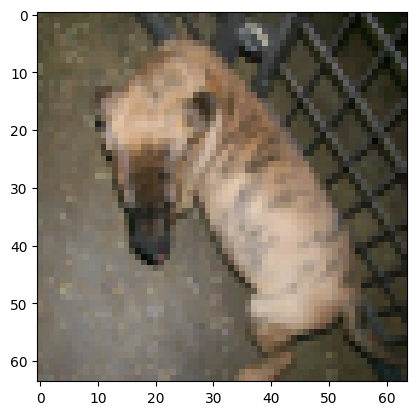

In [14]:
plt.imshow(train_x[46])

In [15]:
test_set_y

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0]])

In [16]:
train_set_y

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])